<a href="https://colab.research.google.com/github/MariaNatiele/AprendizadoMaquina_Projetos/blob/main/2_RegressaoLog%C3%ADsta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Regressão Logística

 Variavel é categorica (sim/não), a regressão logística é a mistura da regressão linear e da função sigmoide.
  </br>
 📗Fontes

1 - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
</br>



In [60]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [61]:
#importando dos dados
dados = pd.read_csv('Eleicao.csv', sep=';')
dados.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


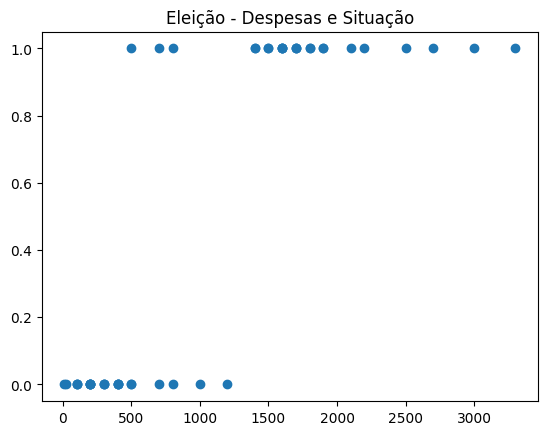

In [62]:
#Gráfico - 0 não foi eleito e 1 foi eleito
plt.scatter(dados.DESPESAS, dados.SITUACAO);
plt.title('Eleição - Despesas e Situação');

In [63]:
dados.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [64]:
#correlação entre despesa e situação - 81 é altae forte
np.corrcoef( dados.DESPESAS,dados.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [65]:
#Separação das variáveis x e y(dependentes e independentes)
#Situação dependente
x = dados.iloc[:,2].values
#coloca em forma de Matriz
x  = x[:, np.newaxis]
#despesa  independente
y = dados.iloc[:, 1].values


In [66]:
#Criando o modelo,  treinando  e mostrando o
modelo  = LogisticRegression()
modelo.fit(x,y)
#Inclinação
modelo.coef_

array([[0.00498364]])

In [67]:
#Interceptação
modelo.intercept_

array([-4.60287217])

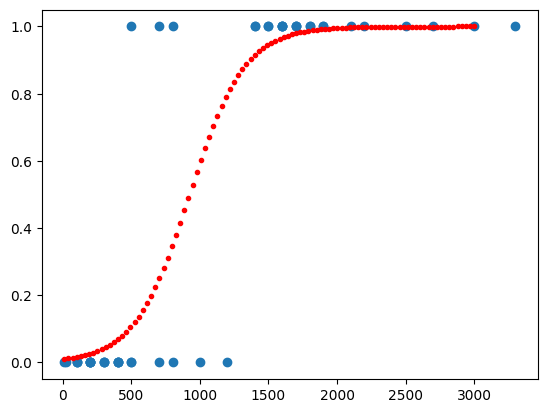

In [68]:
#Gráfico 01
plt.scatter(x,y)

#Dados para função sigmoide
x_teste = np.linspace(10,3000,100)

#função
def model(x):
  return 1/(1 + np.exp(-x))
#Parametros da função
r  = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()

#Gráfico da regressão logística 02
plt.scatter(x_teste,r, color='red', marker='.');


#Testando o modelo

In [69]:
candidato = pd.read_csv('NovosCandidatos.csv', sep=';')
candidato.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [70]:
#Separando a despesa
despesa = candidato.iloc[:,1].values
#
despesa = despesa.reshape(-1,1)

In [71]:
#Previsão
previsao = modelo.predict(despesa)
previsao

array([0, 0, 0, 0, 0, 1, 1])

In [72]:
#Adicionando a previsão ao conjunto
candidato = np.column_stack((candidato, previsao))
candidato

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)